In [1]:
import pandas as pd
import numpy as np

import geopandas as gpd
import momepy
import shapely
import shapely.geometry as sg

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read in the map
map = gpd.read_file("Sidewalk_width_crossings_small.geojson") #It doesn't want to read in this file, when it is in another folder, i.e., if it is inside the "dataset" folder
map


,id,0.9-1.8m,1.8-2.9m,<0.9m,>2.9m,crossing,length,obstacle_free_width,unknown,geometry
0,0,0,0,0,1,0,9.99,>2.9m,0,"LINESTRING (120548.61203 486088.19578, 120548...."
1,1,0,0,0,1,0,3.64,>2.9m,0,"LINESTRING (120558.58273 486088.59136, 120558...."
2,2,1,0,0,0,0,4.30,0.9-1.8m,0,"LINESTRING (120554.77791 486105.08163, 120555...."
3,3,1,0,0,0,0,3.20,0.9-1.8m,0,"LINESTRING (120561.12010 486102.03679, 120561...."
4,4,0,0,0,0,0,9.99,unknown,1,"LINESTRING (120549.11715 486040.41439, 120549...."
...,...,...,...,...,...,...,...,...,...,...
1134,1134,0,0,0,1,1,8.41,>2.9m,0,"LINESTRING (120971.41298 485981.36204, 120971...."
1135,1135,0,0,0,1,1,25.81,>2.9m,0,"LINESTRING (120916.43844 486032.00808, 120890...."
1136,1136,0,0,0,1,1,9.47,>2.9m,0,"LINESTRING (120940.10969 486013.85196, 120940...."
1137,1137,0,0,0,1,1,8.41,>2.9m,0,"LINESTRING (120971.64289 485989.76706, 120971...."


In [3]:
G = momepy.gdf_to_nx(map, approach='primal') #Creates a NetworkX graph from the map

#The following is an example from https://docs.momepy.org/en/stable/examples/clustering.html so I can see if momepy is working
G = momepy.node_degree(G)
G = momepy.closeness_centrality(G, radius=400, distance="mm_len")
G = momepy.meshedness(G, radius=400, distance="mm_len")
nodes, map = momepy.nx_to_gdf(G)


/usr/local/anaconda3/envs/test/lib/python3.10/site-packages/momepy/utils.py:252: UserWarning: Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_network[length] = gdf_network.geometry.length


  0%|          | 0/1006 [00:00<?, ?it/s]

  0%|          | 0/1006 [00:00<?, ?it/s]

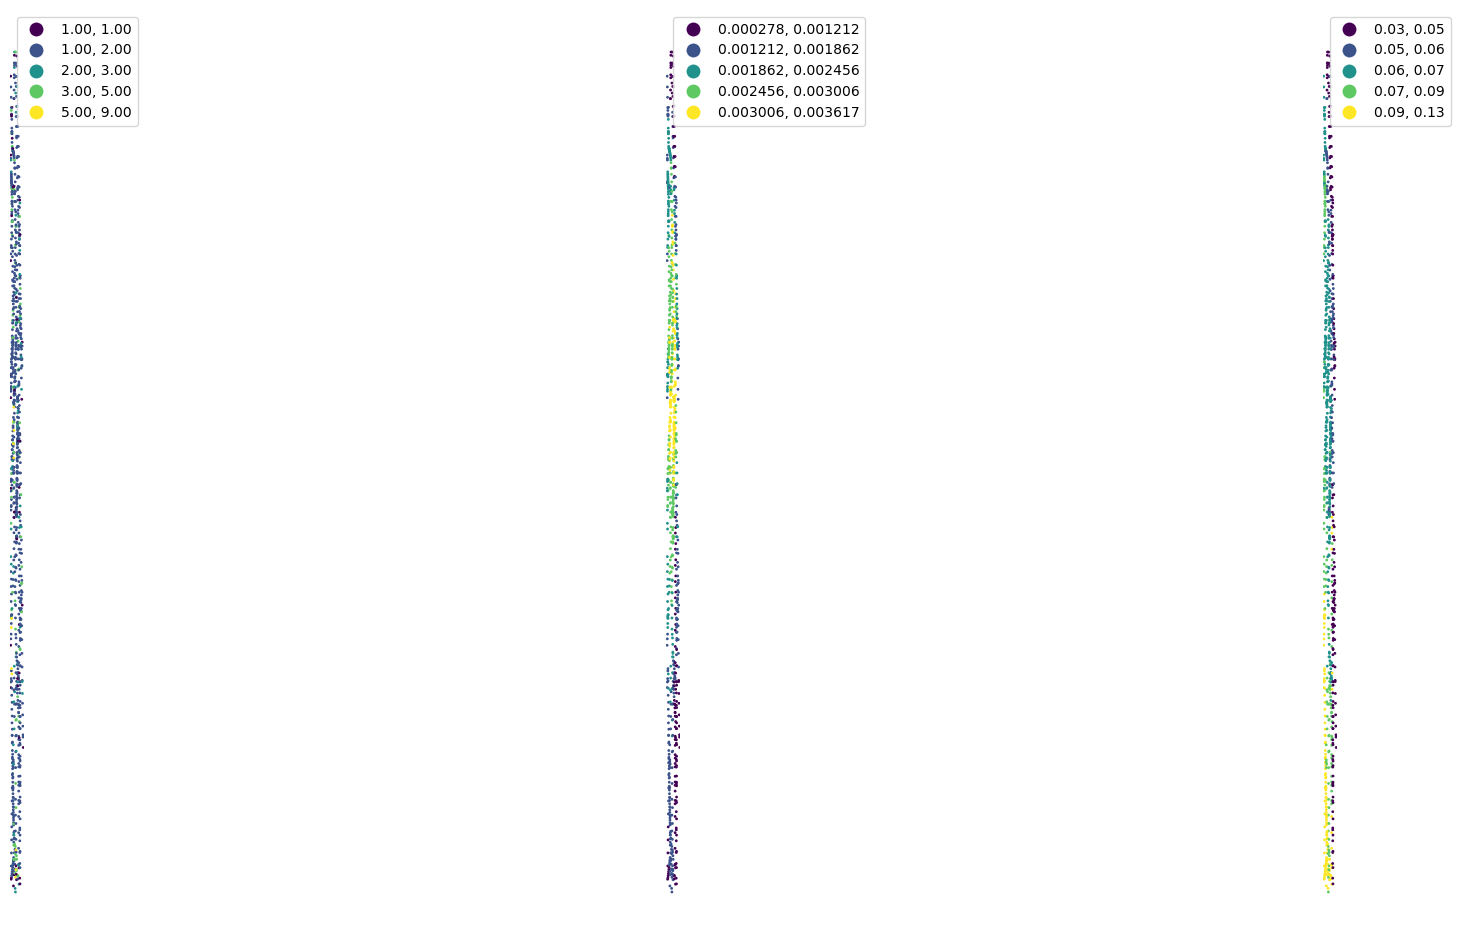

In [4]:
fig, ax = plt.subplots(1, 3, figsize=(24, 12))

nodes.plot("degree", ax=ax[0], scheme="natural_breaks", legend=True, markersize=1)
nodes.plot("closeness", ax=ax[1], scheme="natural_breaks", legend=True, markersize=1, legend_kwds={"fmt": "{:.6f}"})
nodes.plot("meshedness", ax=ax[2], scheme="natural_breaks", legend=True, markersize=1)

ax[0].set_axis_off()
ax[1].set_axis_off()
ax[2].set_axis_off()
